In [172]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#read in the data
df = pd.read_csv(r'D:\dataset\languages_dataset.csv')


In [174]:
#let's look at the data
df.head(20)

,Language,Family,Region,Speakers,Writing System,ISO Code
0,Yoruba,Indo-European,India,76000000,Latin,om
1,Southern Min,Indo-European,India,47000000,Latin,ru
2,Yue (Cantonese),Dravidian,India,75000000,Devanagari,my
3,Spanish,Austronesian,Poland,76900000,Devanagari,it
4,Arabic,Indo-European,Worldwide,76000000,Hangul,ur
5,Awadhi,Kra-Dai,Vietnam,57000000,Latin,it
6,Wu (Shanghainese),Koreanic,China,22000000,Simplified Chinese,bn
7,Yue (Cantonese),Afro-Asiatic,Worldwide,26000000,Devanagari,hak
8,Javanese,Dravidian,Nigeria,23000000,Perso-Arabic,ta
9,Italian,Indo-European,Philippines,60000000,Hangul,ig


In [176]:
#what about missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Language - 0%
Family - 0%
Region - 0%
Speakers - 0%
Writing System - 0%
ISO Code - 2%


In [51]:
df.dtypes

Language          object
Family            object
Region            object
Speakers           int64
Writing System    object
ISO Code          object
dtype: object

In [178]:
# remove duplicates
pivot_df = df.drop_duplicates(subset='Language')

# group by Region and Language. count of Speakers 
pivot_df = df.groupby(['Region', 'Language'])['Speakers'].sum().reset_index()

# Sorting and recognise top 10 Language 
top_10 = pivot_df.sort_values(by='Speakers', ascending=False).head(10)
top_10.reset_index(drop=True, inplace=True)
# Sum of all the Speakers
total_speakers = pivot_df['Speakers'].sum()
# Calculation of the percentage ratio
top_10['Percentage'] = round((top_10['Speakers'] / total_speakers) * 100)

print(top_10)



              Region          Language    Speakers  Percentage
0              India          Maithili  1592000000         3.0
1              India  Xiang (Hunanese)  1091000000         2.0
2              China             Hausa  1038000000         2.0
3          Worldwide            Yoruba   918000000         2.0
4  China (Hong Kong)  Xiang (Hunanese)   918000000         2.0
5   Germany, Austria             Hausa   918000000         2.0
6            Nigeria           Kannada   918000000         2.0
7    Pakistan, India            Korean   918000000         2.0
8              India             Hindi   682000000         1.0
9              India           Punjabi   600000000         1.0


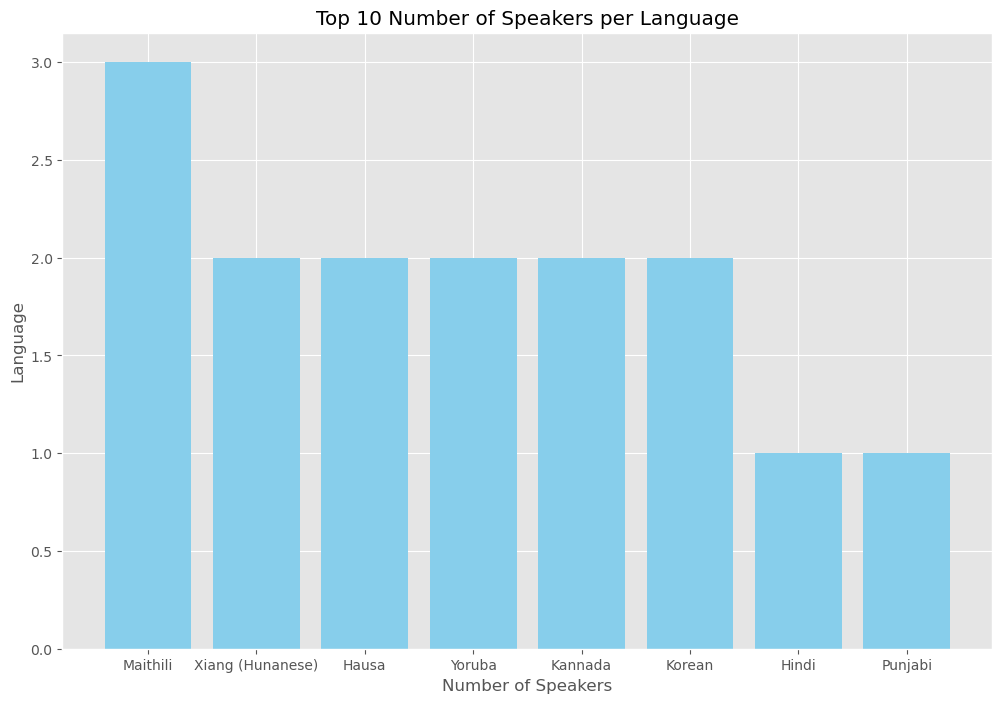

In [180]:
# Let's visualize Top 10 Number of Speakers per Language
plt.bar(top_10['Language'], top_10['Percentage'], color='skyblue')
plt.xlabel('Number of Speakers')
plt.ylabel('Language')
plt.title('Top 10 Number of Speakers per Language')
plt.show()

In [182]:
# Grouping by writing system and summing the number of speakers
writing_system_counts = df.groupby('Writing System')['Speakers'].sum().reset_index().sort_values(by='Speakers', ascending=False)
print(writing_system_counts)


               Writing System     Speakers
11                      Latin  21429600000
5                  Devanagari   2858800000
18                      Tamil   2785900000
6                    Ethiopic   2191000000
3                     Chinese   2164000000
19                     Telugu   1668000000
21        Traditional Chinese   1642000000
14               Perso-Arabic   1637800000
0                      Arabic   1563000000
17         Simplified Chinese   1515000000
9   Kanji, Hiragana, Katakana   1381000000
4                    Cyrillic   1100000000
8                      Hangul   1053000000
13                      Oriya    972900000
2                     Burmese    906000000
15      Shahmukhi, Devanagari    768000000
10                    Kannada    741000000
12                  Malayalam    675000000
7                    Gujarati    671000000
16        Shahmukhi, Gurmukhi    513000000
1                     Bengali    499000000
20                       Thai    466000000


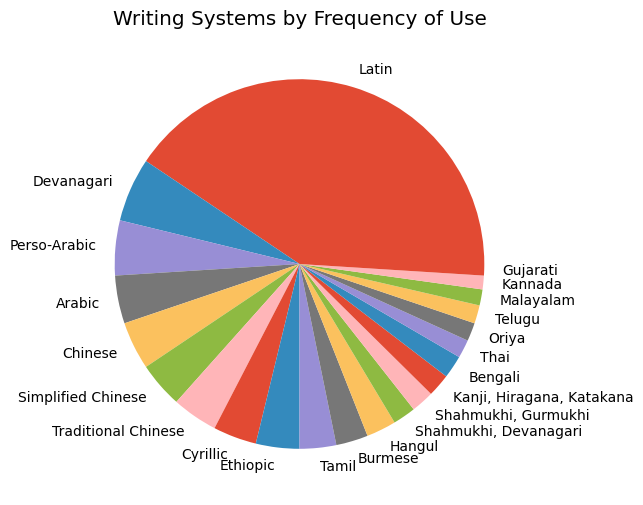

In [168]:
# Calculating sum of writing system 
writing_system_counts = df['Writing System'].value_counts().reset_index()
writing_system_counts.columns = ['Writing System', 'Count']


#  Visualize Writing Systems by Frequency of Use
plt.figure(figsize=(10, 6))
plt.pie(writing_system_counts['Count'], labels=writing_system_counts['Writing System'])
plt.title('Writing Systems by Frequency of Use')
plt.show()

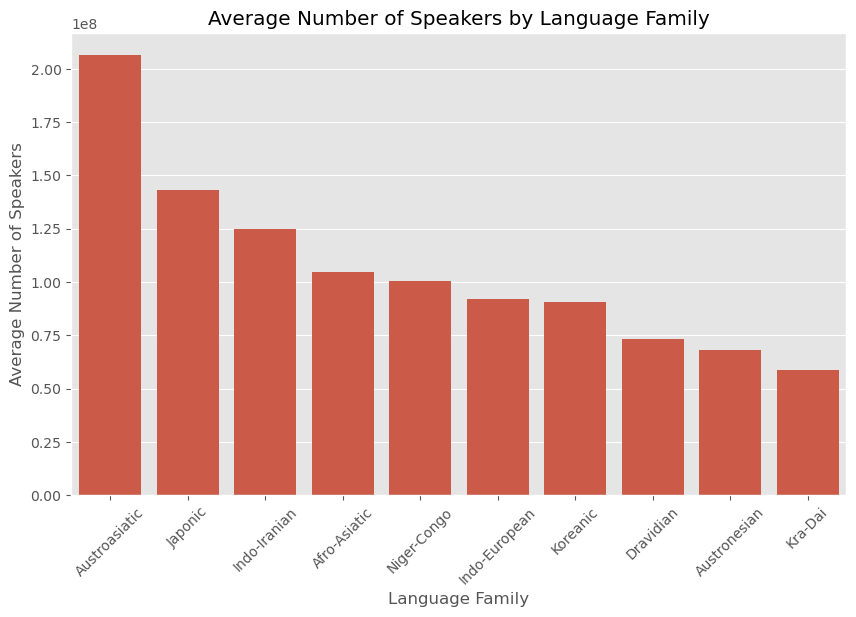

In [170]:
# Average number of speakers by language family

family_speakers = df.groupby('Family')['Speakers'].mean().reset_index().head(10).sort_values(by='Speakers', ascending=False)

# Visualize 'Average Number of Speakers by Language Family'
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Speakers', data=family_speakers)
plt.title('Average Number of Speakers by Language Family')
plt.xticks(rotation=45)
plt.xlabel('Language Family')
plt.ylabel('Average Number of Speakers')
plt.show()